In [4]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston


In [5]:
heart_disease = pd.read_csv("./041 heart-disease.csv")
boston = load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])

In [6]:
np.random.seed(42)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

# let's do the same but for the Regression

In [7]:
Xb = boston_df.drop('target', axis=1)
yb = boston_df['target']
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2)
model = RandomForestRegressor().fit(Xb_train, yb_train)
model.score(Xb_test, yb_test)

0.8494501439301596

# Evaluating a model using the scoring parameter

In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.80327869, 0.86666667, 0.78333333])

# Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report


In [9]:
np.random.seed(42)

clf_model = RandomForestClassifier()
cross_val_score = cross_val_score(clf_model, X, y)

In [10]:
print(f'Model accuracy: {np.mean(cross_val_score) * 100 :.2f}%')

Model accuracy: 82.48%


** Aread under the receiver operating characteristic curve (AUC/ROC)
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) veruss a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = modle predits 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [11]:
from sklearn.metrics import roc_curve
# fit the classifier
clf_model.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf_model.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.87, 0.13],
        [0.41, 0.59],
        [0.45, 0.55],
        [0.89, 0.11],
        [0.19, 0.81],
        [0.14, 0.86],
        [0.4 , 0.6 ],
        [0.96, 0.04],
        [1.  , 0.  ],
        [0.43, 0.57]]),
 61)

In [12]:
y_probs_positive = y_probs[:, 1]

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

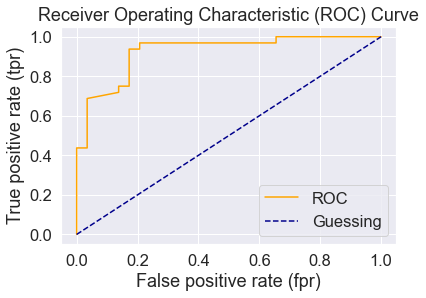

In [14]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    '''
    plt.plot(fpr, tpr, color='orange', label="ROC")
    #plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [15]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

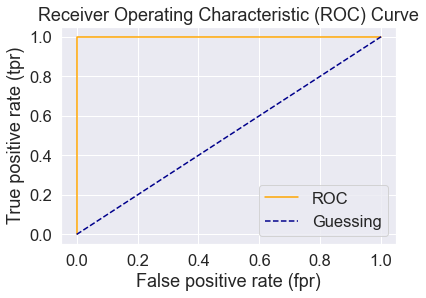

In [16]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [17]:
# prefect AUC score
roc_auc_score(y_test, y_test)

1.0

** confusoin matrix
is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. in essence, giving you and idea of where the model is getting confused

In [18]:
from sklearn.metrics import confusion_matrix
y_preds = clf_model.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [19]:
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,4,28


<AxesSubplot:>

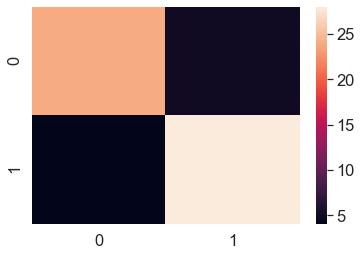

In [20]:
# make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create confusion matrix
conf_mtx = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mtx)

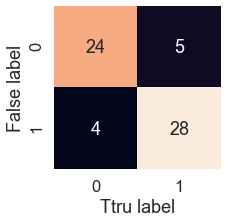

In [22]:
def plot_conf_mtx(conf_mtx):
    '''
    Plots a confusion matrix using Seaborn's heatmap().
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mtx,
                        annot=True, #annotate the boxes with conf_mtx info)
                        cbar=False)
    plt.xlabel("Ttru label")

    plt.ylabel('False label')

plot_conf_mtx(conf_mtx)

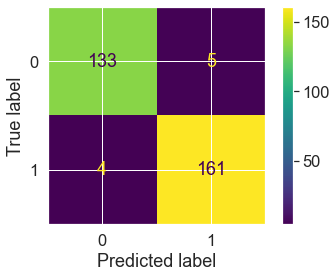

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_model, X, y);

# Classification report

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [34]:
# where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)
pd.DataFrame(classification_report(disease_true,
                                    disease_preds,
                                    output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
